#Project outline

In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 89)

#Datafram import
df = pd.read_csv("Data/Clean_Data/OpsCalculations.csv")



In [2]:
df.head()

,ID,fldOrderNumber,fldQuoteNumber,fldTotalMinutes,fldTotalHours,fldTotalHoursCost,fldRefuseRecycle,fldStandardHours,fldStandardCost,fldChallengeHours,fldChallengeCost,fldCarryUpHours,fldCarryUpCost,fldChallengeCarryUpHrs,fldChallengeCarryUpCost,fldNumberOfInstallers,fldTotalPeiceCount,fldTotalTruckCost,fldHardwareCost,fldWarehouseRec,fldOnSiteRec,fldNewUsedRec,fldOvertimeDeliveryHrs,fldOvertimeDeliveryCost,fldTotalCostAnchorage,fldAnchorageSell,fldBaseDriveHrs,fldBaseDriveCost,fldCombBaseLaborCost,fldTotalCostBaseDrive,fldBaseSell,fldEagleRiverDriveHrs,fldEagleRiverDriveCost,fldCombEagleRiverLaborCost,fldTotalCostEagleRiverDrive,fldEagleRiverSell,fldValleyDriveHrs,fldValleyDriveCost,fldCombValleyLaborCost,fldTotalCostValleyDrive,fldValleySell,fldOutOfTownLabor,fldOutOfTownCost,fldNumOutOfTownInstallers,...,fldLaborStdTime,fldLaborOverTime,fldToolOverWeight,fldPerDiem,fldHotelCost,fldAirFare,fldParking,fldRentalCar,fldMiscTravel,fldDate,fldTime,fldSales,fldProjMnger,fldDesigner,fldAcctCoord,fldHdFilingTeardown,fldHdFilingInstall,fldPostShelves,fldRotaryFiles,fldModWall,fldTotalReconfigTime,fldDavisBacon,fldTruckCharge,fldNumDays,fldCustomCut,fldCorian,fldFrtCost,fldFrtSell,fldApproved,fldQuoted,fldSold,fldOptStandard,fldOptChallenge,fldOptCarryUp,fldWareHouseRecHrs,fldOnSiteRecHrs,fldNewUsedRecHrs,fldMiscServices,fldAvgCostPerStationAnch,fldAvgCostPerStationBase,fldAvgCostPerStationER,fldAvgCostPerStationValley,fldAvgCostPerStationOutOfTown,fldNumberOfStations
0,535,000111,000111,39117,652.0,"$24,776.00",26.1,678,"$25,764.00",789.0,"$29,982.00",743,28234.00,789,"$29,982.00",99,2140.0,$50.00,$975.24,"$3,716.40","$2,229.84","$3,716.40",0.0,$0.00,"$34,723.64","$51,064.18",247.5,"$11,880.00","$41,862.00","$46,603.64","$68,534.77",148.5,"$7,128.00","$37,110.00","$41,851.64","$61,546.53",247.5,"$13,612.50","$43,594.50","$48,336.14","$71,082.56",886.8,"$33,766.40",111,...,880,6.799988,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,3/4/20,1:40:32 PM,Joe Schroeder,Paul Moyers,Paul Moyers,Tiffany Ghan,0,0,0,0,0,0,$0.00,1,1,$0.00,$0.00,$0.00,$0.00,True,False,False,False,True,True,97.80,58.680,97.80,0,"$34,723.64","$46,603.64","$41,851.64","$48,336.14","$33,766.40",1.0
1,585,1,1,2831,47.2,"$1,888.00",1.9,49,"$1,960.00",55.0,"$2,200.00",54,2160.00,57,"$2,280.00",7,123.0,$50.00,$0.00,$283.20,$169.92,$283.20,0.0,$0.00,"$2,613.20","$3,842.94",17.5,$910.00,"$3,190.00","$3,523.20","$5,181.18",10.5,$546.00,"$2,826.00","$3,159.20","$4,645.88",17.5,$962.50,"$3,242.50","$3,575.70","$5,258.38",64.1,"$2,565.20",8,...,64,0.099998,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,1/14/22,11:32:22 AM,Joe Schroeder,NaN,NaN,NaN,0,0,0,0,0,0,$0.00,1,1,$0.00,$0.00,$0.00,$0.00,True,False,False,False,True,True,7.08,4.248,7.08,0,"$2,613.20","$3,523.20","$3,159.20","$3,575.70","$2,565.20",1.0
2,126,54572,111111,14037,234.0,"$8,716.50",9.4,243,"$9,051.75",269.0,"$10,020.25",267,9945.75,283,"$10,541.75",34,913.0,$50.00,$427.68,"$1,307.48",$784.49,"$1,307.48",0.0,$0.00,"$11,805.41","$16,864.87",85.0,"$4,016.25","$14,036.50","$15,821.66","$22,602.37",51.0,"$2,409.75","$12,430.00","$14,215.16","$20,307.37",85.0,"$4,675.00","$14,695.25","$16,480.41","$23,543.44",304.1,"$11,328.73",38,...,304,0.100006,$0.00,$0.00,$0.00,$0.00,$0.00,$17.00,$0.00,8/11/16,9:52:18 AM,Joe Schroeder,Paul Moyers,Melanie Browning,Pam Sebrey,0,0,0,0,0,0,$0.00,1,1,$0.00,$0.00,$0.00,$0.00,True,False,True,False,True,False,35.10,21.060,35.10,0,"$11,805.41","$15,821.66","$14,215.16","$16,480.41","$11,328.73",1.0
3,105,53347,1111111,10078,168.0,"$6,258.00",6.7,175,"$6,518.75",210.0,"$7,822.50",193,7189.25,202,"$7,524.50",5,526.0,$50.00,$3.24,$938.70,$563.22,$938.70,0.0,$0.00,"$8,963.44","$12,804.92",12.5,$590.63,"$8,413.13","$9,554.07","$13,648.67",7.5,$354.38,"$8,176.88","$9,317.82","$13,311.17",12.5,$687.50,"$8,510.00","$9,650.94","$13,787.06",235.2,"$8,873.20",6,...,224,11.200000,$0.00,$0.00,$0.00,$0.00,$0.00,$12.00,$0.00,6/17/16,12:43:42 PM,Tom Hawkins,Tom Hawkins,Lonnie Hawkins,Vickie Stalmarck,0,0,0,0,0,0,$0.

In [3]:
##Filtered the Data down to the needed columns of Data.

df[['fldDate','fldQuoteNumber', 'fldTotalHoursCost', 'fldTotalPeiceCount', 'fldNumDays', 
'fldNumberOfInstallers', 'fldLaborStdTime', 'fldLaborOverTime']]

,fldDate,fldQuoteNumber,fldTotalHoursCost,fldTotalPeiceCount,fldNumDays,fldNumberOfInstallers,fldLaborStdTime,fldLaborOverTime
0,3/4/20,000111,"$24,776.00",2140.0,1,99,880,6.799988
1,1/14/22,1,"$1,888.00",123.0,1,7,64,0.099998
2,8/11/16,111111,"$8,716.50",913.0,1,34,304,0.100006
3,6/17/16,1111111,"$6,258.00",526.0,5,5,224,11.200000
4,4/16/19,123321,"$2,875.70",111.0,4,3,96,8.599998
...,...,...,...,...,...,...,...,...
543,7/29/22,VA Fair OC001,"$8,316.00",759.0,7,5,304,4.399994
544,7/29/22,VA Fair OM001,"$1,165.50",237.0,1,5,40,3.000000
545,2/15/17,VA Stations,"$23,031.67",3422.0,1,94,840,0.700012
546,8/12/22,Wales_81222,"$1,774.50",179.0,4,2,64,6.599998


<AxesSubplot:xlabel='fldNumDays', ylabel='count'>

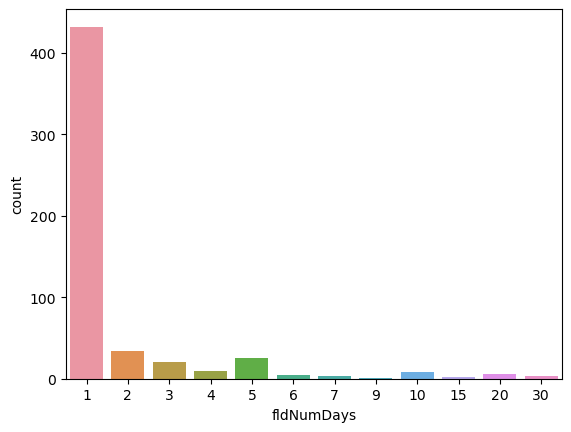

In [4]:
df_foc = df[['fldDate','fldQuoteNumber', 'fldTotalHoursCost', 'fldTotalPeiceCount', 'fldNumDays', 
'fldNumberOfInstallers', 'fldLaborStdTime', 'fldLaborOverTime']]

sns.countplot(x='fldNumDays', data=df_foc)

In [5]:
df_foc.groupby(['fldNumberOfInstallers']).sum().head()


,fldTotalPeiceCount,fldNumDays,fldLaborStdTime,fldLaborOverTime
fldNumberOfInstallers,,,,
0,2.0,1,0,2.200000
1,3072.0,188,512,695.229999
2,7952.0,162,2192,609.299990
3,12300.0,163,4002,370.500014
4,12553.0,134,4592,286.500024


<BarContainer object of 548 artists>

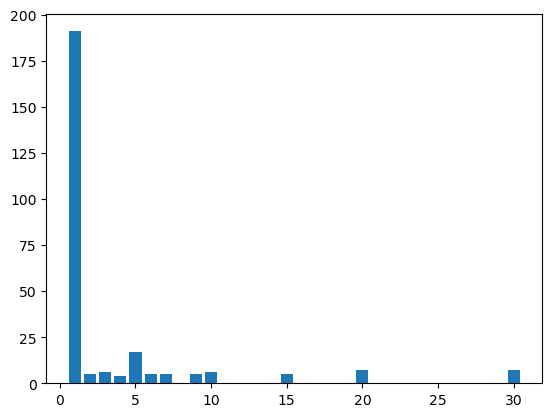

In [6]:
plt.bar(df_foc.fldNumDays, df_foc.fldNumberOfInstallers)

In [55]:
#df_foc['fldDate'] = pd.to_datetime(df_foc['fldDate'])
NumInst = df_foc.groupby(df_foc['fldDate'].dt.to_period('Q'))['fldNumberOfInstallers'].aggregate('sum')
TimeInst = df_foc.groupby(df_foc['fldDate'].dt.to_period('Q'))['fldLaborStdTime'].aggregate('sum')
date_Q = df_foc.groupby(df_foc['fldDate'].dt.to_period('Q'))

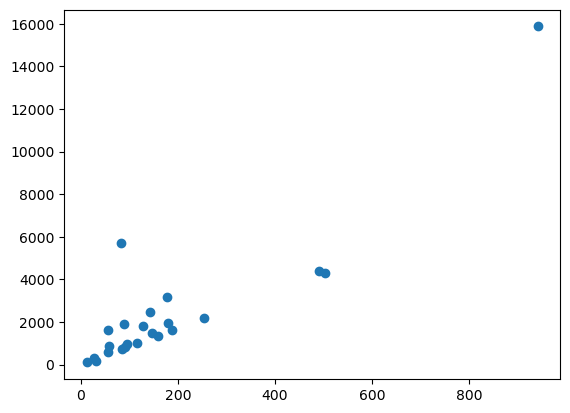

In [56]:
fig1 = plt.scatter(x = NumInst, y = TimeInst)
